# Função rgb_to_hsv(rgbImg)

## Entradas:

- rgbImg: Imagem rgb com intensidades que variem entre 0 a 255.

## Saída:

- Retorna uma imagem HSV com as matrizes H, S e V nos canais 0,1 e 2, respectivamente. O canal H varia entre 0 a 1, o canal S varia entre 0 a 1 e o canal V varia entre 0 a 255. 

In [2]:
import numpy as np

def rgb_to_hsv(rgbImg):
    
    ''' Função rgb_to_hsv(rgbImg)
     Entradas:
    - rgbImg: Imagem rgb com intensidades que variem entre 0 a 255.
    
     Saída:
     Retorna uma imagem HSV com as matrizes H, S e V nos canais 0,1 e 2, respectivamente.
     O canal H varia entre 0 a 1, o canal S varia entre 0 a 1 e o canal V varia entre 0 a
     255. '''
    
    
    # Normalizando os canais R, G e B
    r = rgbImg[:,:,0].ravel()/255
    g = rgbImg[:,:,1].ravel()/255
    b = rgbImg[:,:,2].ravel()/255
            
    # Obtendo os valores de intensidade máxima e mínima dos canais de cada pixel   
    mMax = np.maximum.reduce([r,g,b])
    mMin = np.minimum.reduce([r,g,b])
    
    # Obtendo os valores de canal V 
    V = mMax * 255
    
    # Inicializando H e S
    H = np.zeros(r.size)
    S = np.zeros(r.size)
         
    delta = mMax - mMin
    
    # Obtendo os índices onde R é a maior intensidade 
    idxR = (r==mMax) & (delta != 0)
    # Obtendo os índices onde G é a maior intensidade 
    idxG = (g==mMax) & (delta != 0) & (g>r)
    # Obtendo os índices onde B é a maior intensidade 
    idxB = (b==mMax) & (delta != 0) & (b>r) & (b>g)
    
    # Calculando os valores de H quando:
    
    # 1 - R é o valor máximo
    H[idxR] = ((g[idxR]-b[idxR])/delta[idxR]) % 6
    
    # 2 - G é o valor máximo
    H[idxG] = (b[idxG]-r[idxG])/delta[idxG] + 2
    
    # 3 - B é o valor máximo
    H[idxB] = (r[idxB]-g[idxB])/delta[idxB] + 4
    
    # Normalizando para o intervalor de 0 a 1 
    H = H/6
    
    # Ajustando valores negativos
    H[H<0]= H[H<0]+1 
    
    # Indices onde o máximo valor é diferente de 0
    idxS = mMax!=0 
    
    # calculando o valores do canal S
    S[idxS] = delta[idxS]/mMax[idxS]
    
    # criando a imagem de saída do mesmo formato que a imagem de entrada
    hsvImg = np.empty(rgbImg.shape)
    hsvImg[:,:,0] = H.reshape(rgbImg[:,:,0].shape)
    hsvImg[:,:,1] = S.reshape(rgbImg[:,:,1].shape)
    hsvImg[:,:,2] = V.reshape(rgbImg[:,:,2].shape)
    
    return hsvImg

## Validação

diferença máximo entre os canais H:  7.22480564264e-09
diferença máximo entre os canais S:  2.96075359785e-08
diferença máximo entre os canais V:  0.0

diferença mínima entre os canais H:  -7.3198687528e-09
diferença mínima entre os canais S:  -2.95600270928e-08
diferença mínima entre os canais V:  0.0


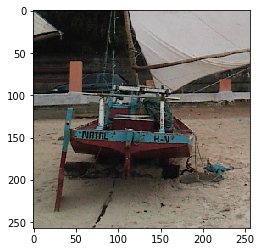

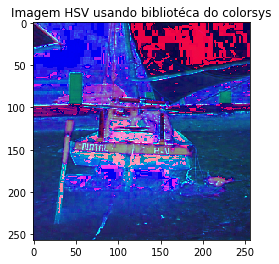

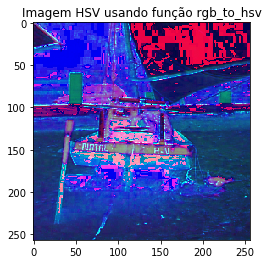

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import colorsys


I = mpimg.imread("./data/boat.tif")  
hsvImg = rgb_to_hsv(I)

r = I[:,:,0].ravel()
g = I[:,:,1].ravel()
b = I[:,:,2].ravel()

g = map(colorsys.rgb_to_hsv, r, g, b)
ga=np.array(list(g)).reshape(I.shape)

plt.figure()
plt.imshow(I)

plt.figure()
plt.imshow(ga, cmap="hsv")
plt.title('Imagem HSV usando bibliotéca do colorsys');

plt.figure()
plt.imshow(hsvImg, cmap="hsv")
plt.title('Imagem HSV usando função rgb_to_hsv');

difH = ga[:,:,0] - hsvImg[:,:,0]
difS = ga[:,:,1] - hsvImg[:,:,1]
difV = ga[:,:,2] - hsvImg[:,:,2]

print("diferença máximo entre os canais H: ", np.max(difH))
print("diferença máximo entre os canais S: ", np.max(difS))
print("diferença máximo entre os canais V: ", np.max(difV))

print("\ndiferença mínima entre os canais H: ", np.min(difH))
print("diferença mínima entre os canais S: ", np.min(difS))
print("diferença mínima entre os canais V: ", np.min(difV))